# Koneoppiminen: Osa 7: Perseptroni

In [18]:
# Kirjoita tähän tietosi!
student_name = 'Riikka Kokko'
student_id = 'AA9067'

## Tehtävä 1
### Aihe: Onnellisuus

2 pistettä

Tutustu aineistoon *Somerville Happiness Survey Data Set* osoitteessa https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey . 

Esikäsittele aineisto. Käytä `scikit-learnMuista asettaa sarakkeiden nimet. 

Vinkki: UTF-16-enkoodattuja tiedostoja varten Pandasin CSV-funktiosta löytyy parametri `encoding='utf-16'`.


In [19]:
# Kirjoita toteutuksesi tähän soluun. 
import pandas as pd
df=pd.read_csv("SomervilleHappinessSurvey2015.csv", encoding='utf-16')
df.head(5)

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [20]:
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [21]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')

Columns: Index(['D', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')
First row by position: D     0
X1    3
X2    3
X3    3
X4    4
X5    2
X6    4
Name: 0, dtype: int64


## Tehtävä 2
### Aihe: Koulutusaineisto

2 pistettä

Jaa aineisto koulutus- (67%) ja testausaineistoon (33%) (`X_train`, `y_train`, `X_test`, `y_test`). Käytä satunnaissiementä `9001`.

In [22]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.model_selection import train_test_split
X=df.drop("D", axis=1)
y=df["D"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9001)

In [23]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tallenna DataFrame df-muuttujaan ja koulutusaineisto.
print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')

Test length: 48
Train length: 95


## Tehtävä 3
### Aihe: Perseptroni

2 pistettä

1. Käytä `scikit-learn`-kirjaston lineaarista perseptronia luodaksesi luokittelija. Käytä satunnaissiementä `9001`. Tallenna luokittelija `pc`-muuttujaan.

2. Ennusta testausaineistosi todennäköisyys olla luokassa käyttäen luokittelijaasi ja tallenna luottamuspisteet muuttujaan `y_score`. Tallenna ennustettujen luokkien tulos muuttujaan `y_pred`.

Vinkki: luottamuspisteet saa lineaarisesta perseptronista `decision_function()`-funktiolla.

In [24]:
# Kirjoita toteutuksesi tähän soluun. 
from sklearn.linear_model import Perceptron
pc = Perceptron(random_state=9001)
pc.fit(X_train, y_train)

Perceptron(random_state=9001)

In [25]:
y_pred = pc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [26]:
y_score=pc.decision_function(X_test)
y_score

array([-38., -18., -25., -39., -38., -27., -22., -28.,  14., -16., -30.,
       -20., -25., -24., -30., -32., -54., -21., -41., -13., -30., -42.,
       -22.,   3., -49., -14.,  38., -30., -25., -33.,  18.,  -6., -26.,
       -60., -31.,  14.,   6., -33., -36., -25., -25., -32., -20., -17.,
       -19., -47., -46.,  -3.])

In [27]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
print(f'Average test accuracy: {pc.score(X_test, y_test)}')

Average test accuracy: 0.4583333333333333


## Tehtävä 4
### Aihe: Kynnysarvon optimointikäyrä

4 pistettä

1. Tallenna luokitteluraportti `cr` ja sekaannusmatriisi `cm` käyttäen `metrics`-moduulia.

2. Laske regressiolle ROC-arvot `scikit-learn`-kirjaston `metrics`-moduulin avulla. Laske myös ROC-käyrän alainen alue muuttujaa `auc`.

3. Piirrä kynnysarvon optimointikäyrä `matplotlib`-kirjastolla. 

4. Kirjoita `pohdinta`-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät. 

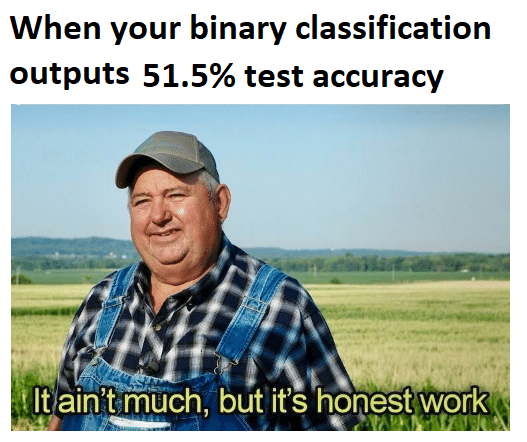

In [42]:
# Kirjoita toteutuksesi tähän soluun.
#Kirjoita pohdinta-merkkijonomuuttujaan mitä ajatuksia ROC-käyrä ja tarkkuus herättävät.
# Pohdintaa.
pohdinta="Kts. allaoleva kuva. Tarkkuus on todella huono 46 %, myöskin ROC käyrä näyttää huonolta."
from IPython.display import display
from PIL import Image
path="pohdintaa.png"
display(Image.open(path))

In [29]:
# 1.Tallenna luokitteluraportti cr ja sekaannusmatriisi cm käyttäen metrics-moduulia.
from sklearn.metrics import classification_report,confusion_matrix
cr=classification_report(y_pred, y_test)
cm=confusion_matrix(y_pred, y_test)

In [30]:
#Laske regressiolle ROC-arvot scikit-learn-kirjaston metrics-moduulin avulla.
from sklearn.metrics import roc_auc_score
roc_score=roc_auc_score(y_test, y_score)
roc_score

0.5130208333333334

In [31]:
# Laske myös ROC-käyrän alainen alue muuttujaa auc.
#from sklearn.metrics import average_precision_score
#auc=average_precision_score(y_test, y_score)
#auc

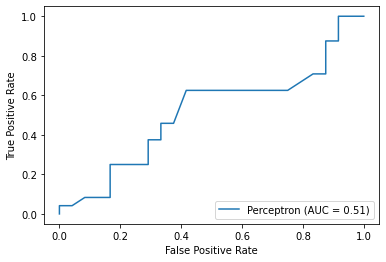

In [37]:
#Piirrä kynnysarvon optimointikäyrä matplotlib-kirjastolla.
import matplotlib.pyplot as plt 
from sklearn import metrics
metrics.plot_roc_curve(pc, X_test, y_test)
fig=plt.show()

In [38]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Tee vastauksesi siten, että tämän solun tuloksena näkyy alla kaaviokuva.
print(f'Classification report:\n {cr}')
print(f'Confusion matrix:\n {cm}')
print(f'auc: {auc}')
print(f'Pohdinta: {pohdinta}')
fig

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.08      0.33      0.13         6

    accuracy                           0.46        48
   macro avg       0.46      0.40      0.37        48
weighted avg       0.74      0.46      0.55        48

Confusion matrix:
 [[20 22]
 [ 4  2]]
auc: <function auc at 0x000001C5EDA810D0>
Pohdinta: ei vastausta


## Toinen vaihtoehto luoda ROC Curve


In [39]:
from sklearn.metrics import roc_curve, auc
scores = pc.decision_function(X_test)
fpr_per, tpr_per, _ = roc_curve(y_test, scores)

In [40]:
scores

array([-38., -18., -25., -39., -38., -27., -22., -28.,  14., -16., -30.,
       -20., -25., -24., -30., -32., -54., -21., -41., -13., -30., -42.,
       -22.,   3., -49., -14.,  38., -30., -25., -33.,  18.,  -6., -26.,
       -60., -31.,  14.,   6., -33., -36., -25., -25., -32., -20., -17.,
       -19., -47., -46.,  -3.])

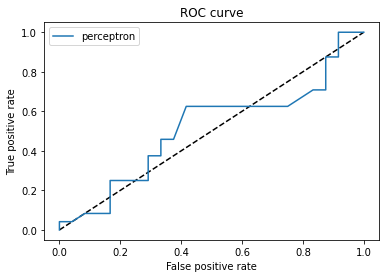

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_per, tpr_per, label='perceptron')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()